# F118326 Data Mining and Machine Learning Coursework

Importing libraries and instance

In [1]:
import numpy
import matplotlib.pyplot as pyplot
from matplotlib.lines import Line2D
from coc131_cw import COC131
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from itertools import product
from sklearn.neural_network import MLPClassifier
from scipy.stats import norm
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches


import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Create an instance of the class
instance = COC131()

C:\Users\porti\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\_param_validation.py:14: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 1.21.6)
  from scipy.sparse import csr_matrix, issparse


Helper function to print hyperparams in a better format

In [2]:
def printHyperparam(hyperparam=None, best_score=None) :
    print(f"Best test accuracy: {best_score * 100:.2f}%")

    print("\nOptimal Hyperparameters:")
    print("+" + "-"*25 + "+" + "-"*25 + "+")
    print("| {:<23} | {:<23} |".format("Parameter", "Value"))
    print("+" + "-"*25 + "+" + "-"*25 + "+")
    print("| {:<23} | {:<23} |".format("Hidden Layers", str(hyperparam['hidden_layer_sizes'])))
    print("| {:<23} | {:<23} |".format("Activation", hyperparam['activation']))
    print("| {:<23} | {:<23} |".format("Solver", hyperparam['solver']))
    print("| {:<23} | {:<23} |".format("Alpha", hyperparam['alpha']))
    print("| {:<23} | {:<23} |".format("Learning Rate", hyperparam['learning_rate_init']))
    print("+" + "-"*25 + "+" + "-"*25 + "+")


## Test q1: Loading the dataset

This function loads the dataset from the directory. Then it processes each image by resizing it to 32x32 pixels and flattening to create feature vectors.

A specific file name can be provided. This will return the processed image and its class name. Otherwise, the whole dataset is loaded into instance variables.

In [3]:
# Testing q1 using a specific filename
numpyArr, className = instance.q1(filename="../dataset/Forest/Forest_1")
print("\nSingle Image Test:\n")
print(f"Image loaded: {className}")
print(f"Image shape: {numpyArr.shape}")

# Calling the whole dataset
_, _ = instance.q1()
print("\nDataset Summary:\n")
print(f"Dataset loaded: {instance.x.shape[0]} images")
print(f"Image dimensions: {instance.x.shape[1:]} pixels")
print(f"Value range: [{instance.x.min():.2f}, {instance.x.max():.2f}]")



Single Image Test:

Image loaded: dataset
Image shape: (1024,)

Dataset Summary:

Dataset loaded: 27000 images
Image dimensions: (1024,) pixels
Value range: [33.33, 255.00]


## Test q2: Standardising the data

This function standirdises the data which means it centers it and then scales it to unit variance. This is done thanks o the scikit-learns StandardScaler

In [4]:
# Getting original data from the instance
original_data = instance.x

# Fetching standardised data using the original data from q1
stdData, stdObject = instance.q2(original_data)

**Displaying the data**

The following visualisation demonstrates this transformation

1. First visualisation compares a single feature's distribution before and after standardisation in a single graph. Here we can appreciate the difference between each
2. Second visualisation compares all the features for both the original set and the standardised set. We can see a smoother visualisation on the standardised graph.

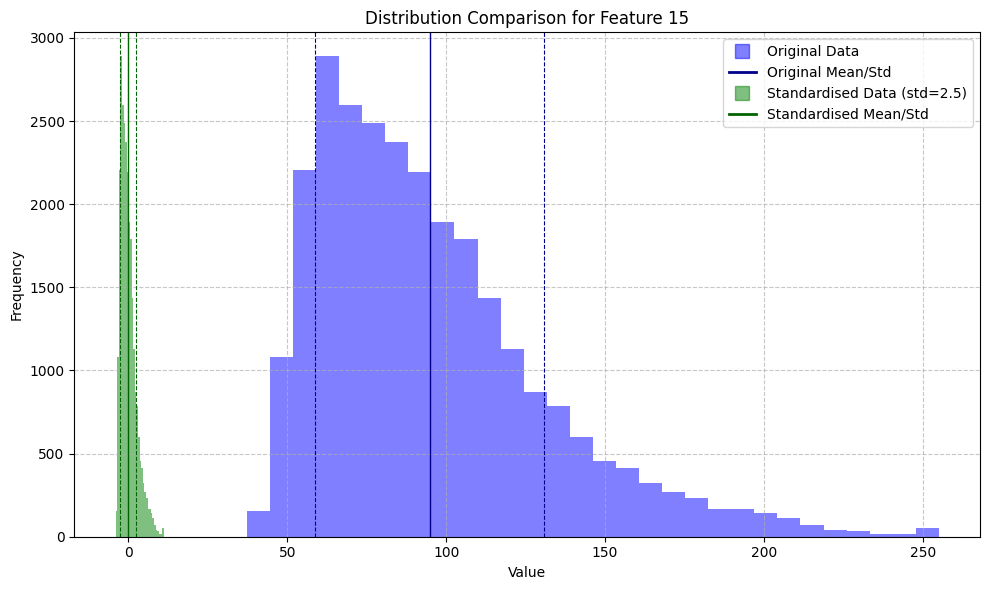

In [5]:
pyplot.figure(figsize=(10, 6))

# Selecting one feature to see distribution change
feature_idx = 15

# Calculating mean and standard deviation for original data and for standardised data
original_mean = numpy.mean(original_data[:, feature_idx])
original_std = numpy.std(original_data[:, feature_idx])

standardised_mean = numpy.mean(stdData[:, feature_idx])
standardised_std = numpy.std(stdData[:, feature_idx])

pyplot.hist(original_data[:, feature_idx], bins=30, alpha=0.5, color='blue', label='Original Data')
pyplot.hist(stdData[:, feature_idx], bins=30, alpha=0.5, color='green', label='Standardised Data (std=2.5)')


# Original data mean and std lines
pyplot.axvline(x=original_mean, color='darkblue', linestyle='-', linewidth=1, label=f'Original Mean: {original_mean:.2f}')
pyplot.axvline(x=original_mean + original_std, color='darkblue', linestyle='--', linewidth=0.8, label=f'Original Mean + Std: {original_mean + original_std:.2f}')
pyplot.axvline(x=original_mean - original_std, color='darkblue', linestyle='--', linewidth=0.8, label=f'Original Mean - Std: {original_mean - original_std:.2f}')

# Standardised data mean and std lines
pyplot.axvline(x=standardised_mean, color='darkgreen', linestyle='-', linewidth=1, label=f'Standardised Mean: {standardised_mean:.2f}')
pyplot.axvline(x=standardised_mean + standardised_std, color='darkgreen', linestyle='--', linewidth=0.8, label=f'Standardised Mean + Std: {standardised_mean + standardised_std:.2f}')
pyplot.axvline(x=standardised_mean - standardised_std, color='darkgreen', linestyle='--', linewidth=0.8, label=f'Standardised Mean - Std: {standardised_mean - standardised_std:.2f}')

pyplot.title(f'Distribution Comparison for Feature {feature_idx}')
pyplot.xlabel('Value')
pyplot.ylabel('Frequency')
pyplot.grid(True, linestyle='--', alpha=0.7)

legend_elements = [
    Line2D([0], [0], color='blue', lw=0, marker='s', markersize=10, alpha=0.5, label='Original Data'),
    Line2D([0], [0], color='darkblue', lw=2, label='Original Mean/Std'),
    Line2D([0], [0], color='green', lw=0, marker='s', markersize=10, alpha=0.5, label='Standardised Data (std=2.5)'),
    Line2D([0], [0], color='darkgreen', lw=2, label='Standardised Mean/Std')
]
pyplot.legend(handles=legend_elements, loc='upper right')

pyplot.tight_layout()
pyplot.savefig('q2-1.png')
pyplot.show()

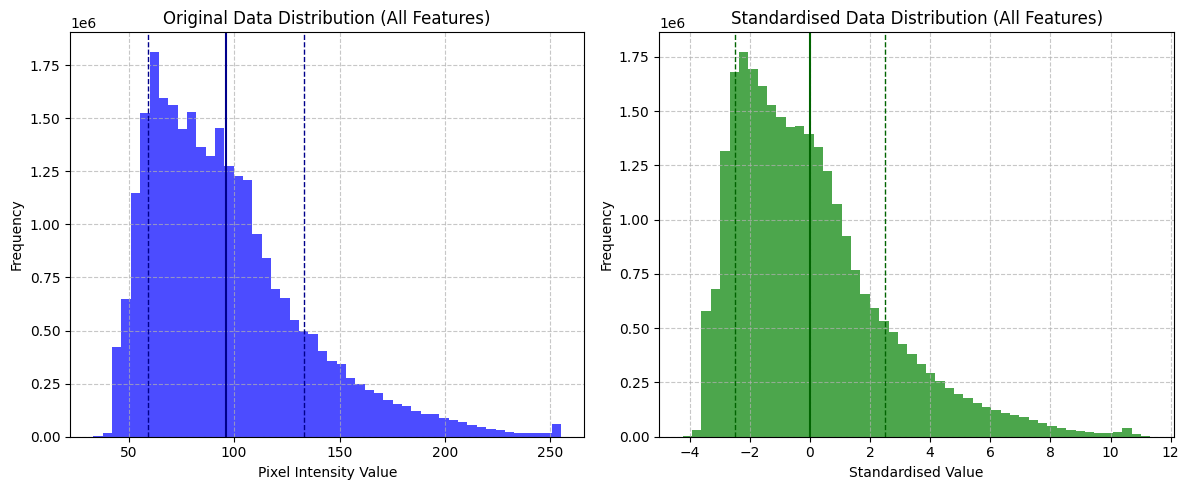

In [6]:
pyplot.figure(figsize=(12, 5))

# Flattening all features to get overall distribution
original_all = original_data.flatten()
standardised_all = stdData.flatten()

# Original data distribution
pyplot.subplot(1, 2, 1)
pyplot.hist(original_all, bins=50, alpha=0.7, color='blue')
pyplot.title('Original Data Distribution (All Features)')
pyplot.xlabel('Pixel Intensity Value')
pyplot.ylabel('Frequency')
pyplot.grid(True, linestyle='--', alpha=0.7)

original_mean = numpy.mean(original_all)
original_std = numpy.std(original_all)
pyplot.axvline(x=original_mean, color='darkblue', linestyle='-', linewidth=1.5)
pyplot.axvline(x=original_mean + original_std, color='darkblue', linestyle='--', linewidth=1)
pyplot.axvline(x=original_mean - original_std, color='darkblue', linestyle='--', linewidth=1)

# Standardised data distribution
pyplot.subplot(1, 2, 2)
pyplot.hist(standardised_all, bins=50, alpha=0.7, color='green')
pyplot.title('Standardised Data Distribution (All Features)')
pyplot.xlabel('Standardised Value')
pyplot.ylabel('Frequency')
pyplot.grid(True, linestyle='--', alpha=0.7)

std_mean = numpy.mean(standardised_all)
std_std = numpy.std(standardised_all)
pyplot.axvline(x=std_mean, color='darkgreen', linestyle='-', linewidth=1.5)
pyplot.axvline(x=std_mean + std_std, color='darkgreen', linestyle='--', linewidth=1)
pyplot.axvline(x=std_mean - std_std, color='darkgreen', linestyle='--', linewidth=1)

pyplot.tight_layout()
pyplot.savefig('q2-2.png', dpi=300, bbox_inches='tight')
pyplot.show()

## Test q3: MLP Classifier and Hyperparameter Optimisation

Two methods were employed to explore the most optimal hyperparams for the MLP Classifier: sequential and brute force

The following cell shows **sequential search** which tests one hyperparam at a time. By compounding each best hyperparam, we can reach an optimal configuration more effectively than brute force

In [5]:
# Setting up train/test split
X_train, X_test, y_train, y_test = train_test_split(stdData, instance.y, test_size=0.3, random_state=42, stratify=instance.y)

In [ ]:
# Best hyperparams with default values
hyperparams = {
    'hidden_layer_sizes': (100, 100),
    'activation': 'relu',
    'solver': 'adam',
    'alpha': 0.0001,
    'learning_rate_init': 0.001
}

# Finding the best hidden layer
hidden_layer_options = [(100, 100), (100, 200), (200, 100), (512, 128), (128, 64)] 
best_score = -1

for hidden_layers in hidden_layer_options:
    model = MLPClassifier(**{**hyperparams, 'hidden_layer_sizes': hidden_layers})
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    
    if score > best_score:
        best_score = score
        hyperparams['hidden_layer_sizes'] = hidden_layers

print(f"Best hidden_layer_sizes: {hyperparams['hidden_layer_sizes']} (accuracy: {best_score:.4f})")

# Finding the best activation function
activation_options = ['relu', 'tanh', 'logistic']
best_score = -1

for activation in activation_options:
    model = MLPClassifier(**{**hyperparams, 'activation': activation})
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    
    if score > best_score:
        best_score = score
        hyperparams['activation'] = activation

print(f"Best activation: {hyperparams['activation']} (accuracy: {best_score:.4f})")

# Finding the best solver function
solver_options = ['adam', 'lbfgs', 'sgd']  
best_score = -1

for solver in solver_options:
    model = MLPClassifier(**{**hyperparams, 'solver': solver})
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    
    if score > best_score:
        best_score = score
        hyperparams['solver'] = solver

print(f"Best solver: {hyperparams['solver']} (accuracy: {best_score:.4f})")

# Finding the best alpha
alpha_options = [0.00001, 0.0001, 0.001, 0.1, 1.0]
best_score = -1

for alpha in alpha_options:
    model = MLPClassifier(**{**hyperparams, 'alpha': alpha})
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    
    if score > best_score:
        best_score = score
        hyperparams['alpha'] = alpha

print(f"Best alpha: {hyperparams['alpha']} (accuracy: {best_score:.4f})")

# Finding the best learning_rate_init
learning_rate_options = [0.0001, 0.001, 0.01, 0.1]
best_score = -1

for lr in learning_rate_options:
    model = MLPClassifier(**{**hyperparams, 'learning_rate_init': lr})
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    
    if score > best_score:
        best_score = score
        hyperparams['learning_rate_init'] = lr

print(f"Best learning_rate_init: {hyperparams['learning_rate_init']} (accuracy: {best_score:.4f})\n")

printHyperparam(hyperparams, best_score)

Best hidden_layer_sizes: (100, 100) (accuracy: 0.4695)
Best activation: relu (accuracy: 0.4305)
Best solver: lbfgs (accuracy: 0.4715)
Best alpha: 1.0 (accuracy: 0.5049)
Best learning_rate_init: 0.0001 (accuracy: 0.5006)

Best test accuracy: 50.06%

Optimal Hyperparameters:
+-------------------------+-------------------------+
| Parameter               | Value                   |
+-------------------------+-------------------------+
| Hidden Layers           | (100, 100)              |
| Activation              | relu                    |
| Solver                  | lbfgs                   |
| Alpha                   | 1.0                     |
| Learning Rate           | 0.0001                  |
+-------------------------+-------------------------+


The following cell then shows the **brute force** method which tests a large range of combinations simultaneously. Due to the large computational efforts with this method, the hyperparams were split into smaller subsets that were tested to make the search more manageable.

We will test the sequential search most optimal hyperparams alongside other combinations to determine a higher test accuracy

In [ ]:
# FIRST COMBINATION
hyperparams = {
    'hidden_layer_sizes': [(100, 100), (512, 128)], 
    'activation': ['relu'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.1, 1.0], 
    'learning_rate_init': [0.0001, 0.01 , 0.01]
}

# SECOND COMBINATION
# hyperparams = {
#     'hidden_layer_sizes': [(200, 100), (128, 512)],
#     'activation': ['identity', 'logistic'],
#     'solver': ['adam', 'sgd'],
#     'alpha': [0.00001, 0.0001, 0.001],
#     'learning_rate_init': [0.01, 0.1, 1.0],
# }

# THIRD COMBINATION
# hyperparams = {
#     'hidden_layer_sizes': [(300, 150), (150, 75)],
#     'activation': ['relu', 'tanh'],
#     'solver': ['sgd', 'lbfgs'],
#     'alpha': [0.01, 0.1, 5.0],
#     'learning_rate_init': [0.0005, 0.005, 0.05],
# }


# Storing best model and its performance
best_model = None
best_score = -1
best_params = None

# Generating all combinations of hyperparameters
param_keys = list(hyperparams.keys())
param_values = list(hyperparams.values())
param_combinations = list(product(*param_values))

# Evaluating each combination & train the model
for combination in param_combinations:
    current_params = dict(zip(param_keys, combination))
    
    model = MLPClassifier(random_state=42,**current_params)
    model.fit(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    if test_score > best_score:
        best_score = test_score
        best_model = model
        best_params = current_params

printHyperparam(best_params, best_score)

Best test accuracy: 52.67%

Optimal Hyperparameters:
+-------------------------+-------------------------+
| Parameter               | Value                   |
+-------------------------+-------------------------+
| Hidden Layers           | (512, 128)              |
| Activation              | relu                    |
| Solver                  | adam                    |
| Alpha                   | 1.0                     |
| Learning Rate           | 0.0001                  |
+-------------------------+-------------------------+


In conclusion, the best test accuracy found was: 52.7%

The best hyperparams found were:

| Parameter        | Value             |
|------------------|-------------------|
| Hidden Layers    | (512, 128)        |
| Activation       | relu              |
| Solver           | adam              |
| Alpha            | 1.0               |
| Learning Rate    | 0.0001            |


Now we visualise the best model with the most optimal hyperparams. There is a clear difference between the training and testing accuracies. This is due to overfitting, where the model has learnt the training data too well but then struggles to generalise to unseen examples

In [6]:
best_model, loss_curve, train_acc, test_acc = instance.q3()

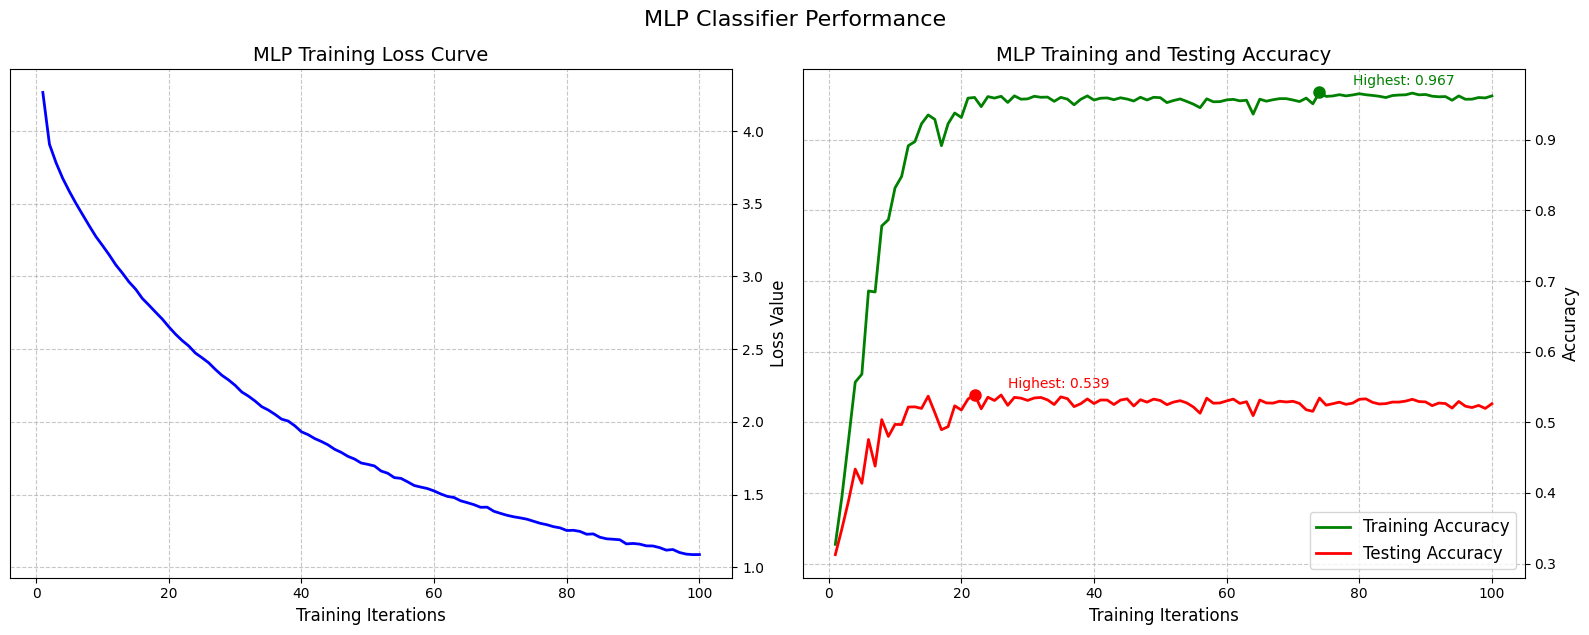

In [7]:
fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(16, 7)) 

# Plot 1: Loss curve
iterations = numpy.arange(1, len(loss_curve) + 1)
ax1.plot(iterations, loss_curve, 'b-', linewidth=2)
ax1.set_title('MLP Training Loss Curve', fontsize=14)
ax1.set_xlabel('Training Iterations', fontsize=12)
ax1.yaxis.set_label_position('right')
ax1.yaxis.tick_right() 
ax1.set_ylabel('Loss Value', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot 2: Accuracy curves
ax2.plot(iterations, train_acc, 'g-', label='Training Accuracy', linewidth=2)
ax2.plot(iterations, test_acc, 'r-', label='Testing Accuracy', linewidth=2)

# Peak Values
train_peak_idx = numpy.argmax(train_acc)
train_peak_value = train_acc[train_peak_idx]
train_peak_iter = iterations[train_peak_idx]

test_peak_idx = numpy.argmax(test_acc)
test_peak_value = test_acc[test_peak_idx]
test_peak_iter = iterations[test_peak_idx]

ax2.plot(train_peak_iter, train_peak_value, 'go', markersize=8)
ax2.plot(test_peak_iter, test_peak_value, 'ro', markersize=8)

ax2.annotate(f'Highest: {train_peak_value:.3f}', 
    xy=(train_peak_iter, train_peak_value),
    xytext=(train_peak_iter+5, train_peak_value+0.01),
    fontsize=10,
    color='green')

ax2.annotate(f'Highest: {test_peak_value:.3f}', 
    xy=(test_peak_iter, test_peak_value),
    xytext=(test_peak_iter+5, test_peak_value+0.01),
    fontsize=10,
    color='red')

ax2.set_title('MLP Training and Testing Accuracy', fontsize=14)
ax2.set_xlabel('Training Iterations', fontsize=12)
ax2.yaxis.set_label_position('right')
ax2.yaxis.tick_right()
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.legend(fontsize=12)

pyplot.tight_layout(rect=[0, 0.08, 1, 0.95])
pyplot.suptitle('MLP Classifier Performance', fontsize=16, y=0.98)
pyplot.savefig('q3-1.png', dpi=300, bbox_inches='tight')
pyplot.show()

The following visualisation represents a confusion matrix on how well the optimised MLP classifier identifies each land use category in the test dataset. The higher the blue cells, the higher the classification accuracy

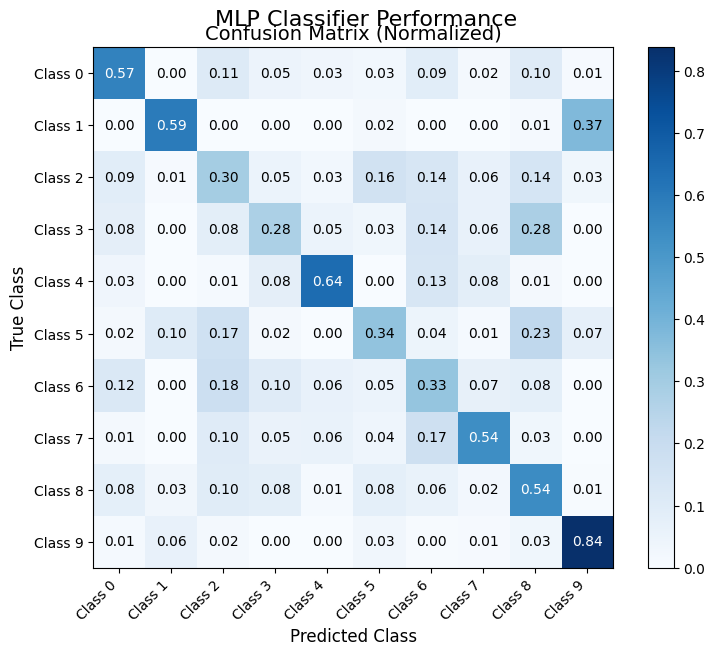

In [10]:

fig, ax1 = pyplot.subplots(1, 1, figsize=(8, 7)) 

# Getting predictions from the best model
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
class_names = [f"Class {int(i)}" for i in numpy.unique(y_test)]

# Creating a normalized confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, numpy.newaxis]

im = ax1.imshow(cm_norm, interpolation='nearest', cmap=pyplot.cm.Blues)
ax1.set_title('Confusion Matrix (Normalized)', fontsize=14)
tick_marks = numpy.arange(len(class_names))
ax1.set_xticks(tick_marks)
ax1.set_yticks(tick_marks)
ax1.set_xticklabels(class_names, rotation=45, ha='right')
ax1.set_yticklabels(class_names)

thresh = cm_norm.max() / 2.
for i, j in numpy.ndindex(cm_norm.shape):
    ax1.text(j, i, f'{cm_norm[i, j]:.2f}',
             ha="center", va="center",
             color="white" if cm_norm[i, j] > thresh else "black")

fig.colorbar(im, ax=ax1)
ax1.set_ylabel('True Class', fontsize=12)
ax1.set_xlabel('Predicted Class', fontsize=12)

pyplot.tight_layout(rect=[0, 0.08, 1, 0.95])
pyplot.suptitle('MLP Classifier Performance', fontsize=16, y=0.98)
pyplot.savefig('q3-2.png', dpi=300, bbox_inches='tight')
pyplot.show()

## Test q4: Impact of Alpha on Model Performance

A wide range of different alpha values are tested for its impact on the model. Initially this range included the following

`alphas = [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]`

After analysing the impact, it was observed that the effect of alpha on the model accuracy heavily decreased after an alpha value of 1. This means excessive regularisation forces the model params to be too small.

In following visualisations, the range of alphas was reduced to the following

`alphas = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0]`

In [8]:
# Fetching results from q4
alpha_results = instance.q4()

Alpha: 0.000100, Train: 0.8847, Test: 0.4793, Norm: 40.96
Alpha: 0.000500, Train: 0.8456, Test: 0.4579, Norm: 40.75
Alpha: 0.001000, Train: 0.9022, Test: 0.5048, Norm: 41.27
Alpha: 0.005000, Train: 0.8547, Test: 0.4547, Norm: 40.54
Alpha: 0.010000, Train: 0.8797, Test: 0.4801, Norm: 40.73
Alpha: 0.050000, Train: 0.8513, Test: 0.4588, Norm: 39.82
Alpha: 0.100000, Train: 0.8954, Test: 0.4974, Norm: 38.41
Alpha: 0.500000, Train: 0.8352, Test: 0.4659, Norm: 31.32
Alpha: 1.000000, Train: 0.8366, Test: 0.4853, Norm: 25.82
Alpha: 5.000000, Train: 0.6369, Test: 0.4817, Norm: 10.73
Alpha: 10.000000, Train: 0.4986, Test: 0.4507, Norm: 6.27


The following visualisations are shown

1. Effect of Alpha on Model Accuracy: Represents the relationship between alpha and the model's ability to correctly classify images.
2. Impact of Alpha on Overfitting: Clearly represents the gap between the training and testing accuracies
3. Effect of Alpha on Parameter Magnitude: Shows how regularisation constraints the model's parameter values

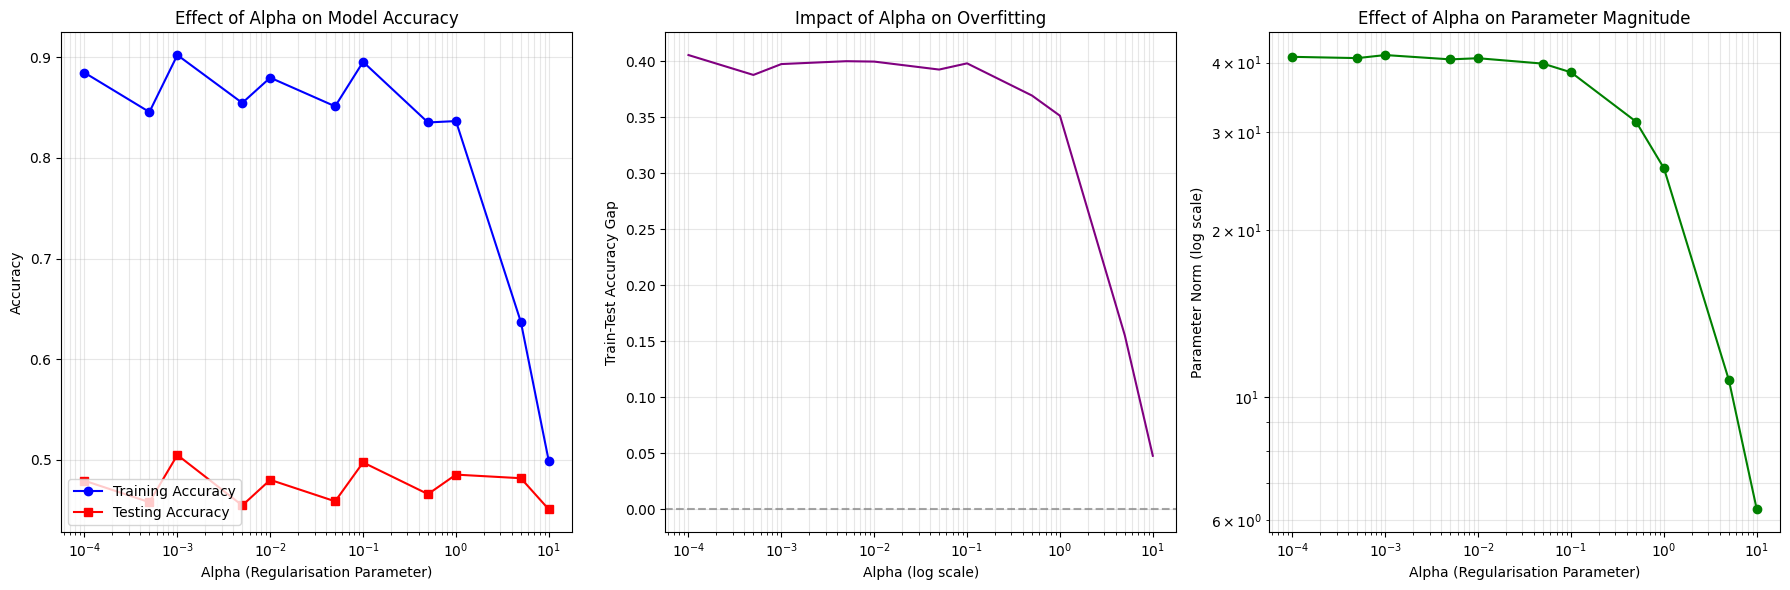

In [9]:
pyplot.figure(figsize=(18, 6))

# Plot 1: Effect of Alpha on Model Accuracy
pyplot.subplot(1, 3, 1)
pyplot.semilogx(alpha_results['alphas'], alpha_results['train_accuracies'], 'o-b', label='Training Accuracy')
pyplot.semilogx(alpha_results['alphas'], alpha_results['test_accuracies'], 's-r', label='Testing Accuracy')
pyplot.xlabel('Alpha (Regularisation Parameter)')
pyplot.ylabel('Accuracy')
pyplot.title('Effect of Alpha on Model Accuracy')
pyplot.legend(loc='lower left')
pyplot.grid(True, alpha=0.3, which='both')

# Plot 2: Train-Test Gap (Overfitting Measure)
pyplot.subplot(1, 3, 2)
pyplot.semilogx(alpha_results['alphas'], alpha_results['train_test_gaps'], color='purple')
pyplot.axhline(y=0, color='gray', linestyle='--', alpha=0.7)
pyplot.xlabel('Alpha (log scale)')
pyplot.ylabel('Train-Test Accuracy Gap')
pyplot.title('Impact of Alpha on Overfitting')
pyplot.grid(True, alpha=0.3, which='both')

# Plot 3: Effect of Alpha on Parameter Magnitude
pyplot.subplot(1, 3, 3)
pyplot.loglog(alpha_results['alphas'], alpha_results['coefs_norm'], 'o-', color='green')
pyplot.xlabel('Alpha (Regularisation Parameter)')
pyplot.ylabel('Parameter Norm (log scale)')
pyplot.title('Effect of Alpha on Parameter Magnitude')
pyplot.grid(True, alpha=0.3, which='both')

pyplot.tight_layout()
pyplot.savefig('q4-1.png', dpi=300, bbox_inches='tight')
pyplot.show()

This visualisation analyses how the different alpha values affect the models ability to correctly clasify each individual land use category. The Forest and SeaLake classes display the highest F1 scores, this could suggest that these landscapes have more distinct features than the model can identify. The rest of the classes are observed to be more consistent.

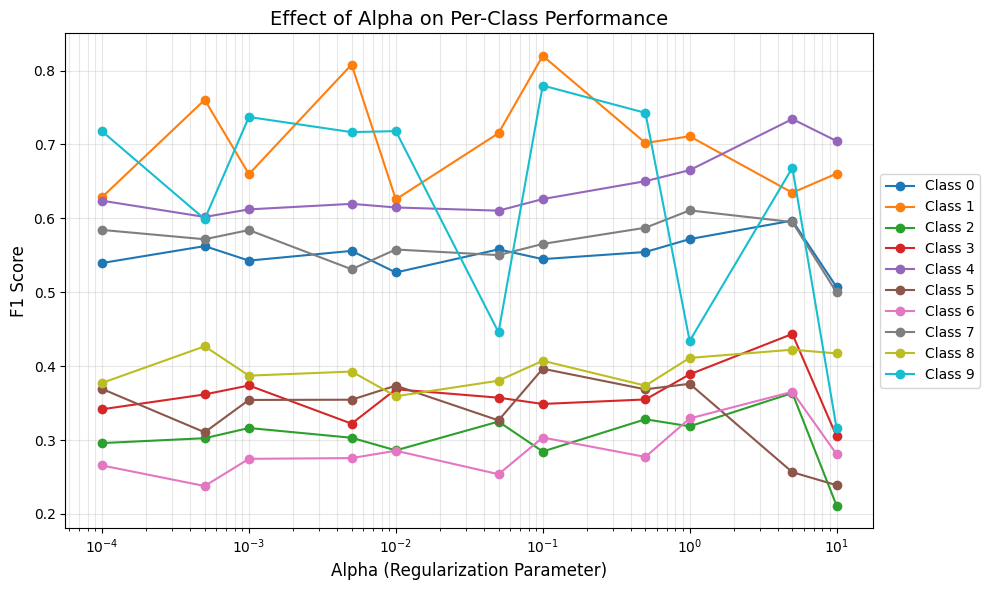

In [11]:
pyplot.figure(figsize=(10, 6))

class_performance = {}
unique_classes = numpy.unique(instance.y).astype(int)

# Initializing performance tracking for each class
for cls in unique_classes:
    class_performance[cls] = []

# Loop through all alphas from our original experiment
for alpha in alpha_results['alphas']:
    # Using the most optimal hyperparameters from the previous question
    params = {
        'hidden_layer_sizes': (512, 128),
        'activation': 'relu',
        'solver': 'adam',
        'alpha': alpha,
        'learning_rate_init': 0.0001,
        'max_iter': 100
    }
    
    # Train a model with this alpha
    model = MLPClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    for cls in unique_classes:
        y_true_bin = (y_test == cls)
        y_pred_bin = (y_pred == cls)
        
        # Calculate F1 score for this class
        f1 = f1_score(y_true_bin, y_pred_bin)
        class_performance[cls].append(f1)

for cls in unique_classes:
    pyplot.semilogx(alpha_results['alphas'], class_performance[cls], 'o-', label=f'Class {cls}')

pyplot.xlabel('Alpha (Regularization Parameter)', fontsize=12)
pyplot.ylabel('F1 Score', fontsize=12)
pyplot.title('Effect of Alpha on Per-Class Performance', fontsize=14)
pyplot.grid(True, alpha=0.3, which='both')
pyplot.legend(loc='center left', bbox_to_anchor=(1, 0.5))
pyplot.tight_layout()
pyplot.savefig('q4-2.png', dpi=300, bbox_inches='tight')
pyplot.show()

## Test q5: Hypothesis Testing for CV with and without Stratification

In this question investigate the impact of stratification in cross-validation on model performance. Regular K-Fold cross-validation is compared against Stratified K-Fold cross-validation.

In [ ]:
# Running q5 to get the results
kf_mean, skf_mean, p_value, result = instance.q5()

From the visualisation we can see that stratification does not impact the model evaluation. This may be due to the classes in the dataset being already relatively well-balance out.

Regular K-Fold mean accuracy: 0.4266
Stratified K-Fold mean accuracy: 0.4163
Absolute difference: 0.0103
Percentage difference: 2.47%
p-value from paired t-test: 0.2860
Result: Splitting method had no effect


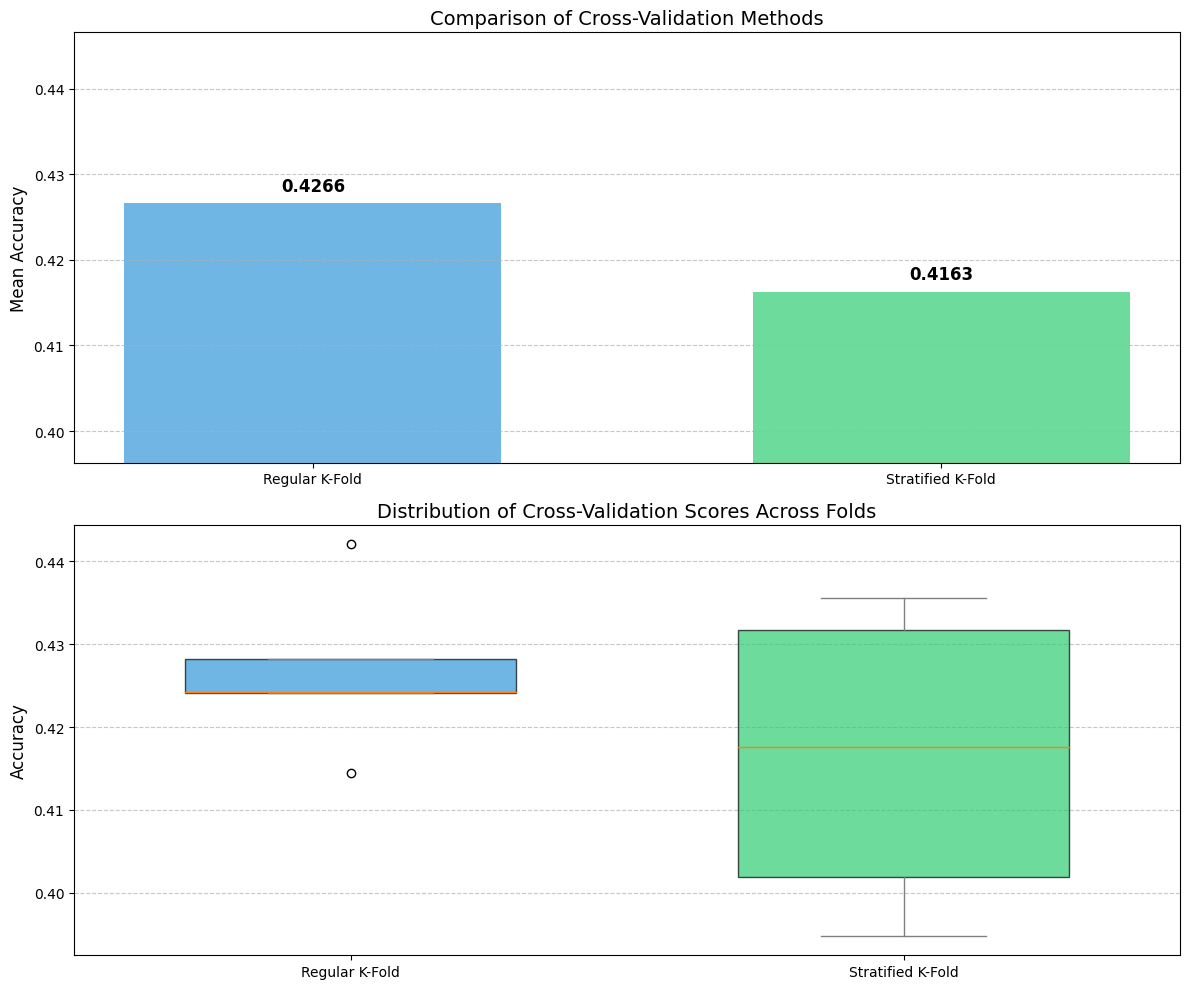

In [ ]:
pyplot.figure(figsize=(12, 10))

# Bar chart comparison
pyplot.subplot(2, 1, 1)
methods = ['Regular K-Fold', 'Stratified K-Fold']
accuracies = [kf_mean, skf_mean]

colors = ['#3498db', '#2ecc71']
bars = pyplot.bar(methods, accuracies, color=colors, width=0.6, alpha=0.7)

# Accuracy values on top of the bars
for bar in bars:
    height = bar.get_height()
    pyplot.text(bar.get_x() + bar.get_width()/2., height + 0.001,
        f'{height:.4f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

pyplot.title('Comparison of Cross-Validation Methods', fontsize=14)
pyplot.ylabel('Mean Accuracy', fontsize=12)

baseline = min(accuracies) - 0.02
y_max = max(accuracies) + 0.02
pyplot.ylim(baseline, y_max)
pyplot.grid(axis='y', linestyle='--', alpha=0.7)

# Statistical significance indicator
if p_value < 0.05:
    x1, x2 = 0, 1
    y = max(accuracies) + 0.01 
    pyplot.plot([x1, x1, x2, x2], [y, y+0.005, y+0.005, y], lw=1.5, c='black')
    pyplot.text((x1+x2)/2, y+0.007, '*', ha='center', va='bottom', color='black', fontsize=16)
    
    # Arrow pointing to the better method
    better_idx = 0 if kf_mean > skf_mean else 1
    pyplot.annotate(f'Better performance',
        xy=(better_idx, accuracies[better_idx]),
        xytext=(better_idx, max(accuracies) + 0.015),
        arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
        ha='center', fontweight='bold')

# Distribution of fold scores (box plot)
pyplot.subplot(2, 1, 2)

kf_scores_array = instance.cv_results['kf_scores']  
skf_scores_array = instance.cv_results['skf_scores']

box = pyplot.boxplot([kf_scores_array, skf_scores_array], 
    patch_artist=True, 
    labels=methods,
    widths=0.6)

# Coloring the boxes to match the bar chart
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Customizin other box plot elements
for element in ['whiskers', 'caps', 'fliers']:
    for item in box[element]:
        item.set(color='gray')

    
pyplot.title('Distribution of Cross-Validation Scores Across Folds', fontsize=14)
pyplot.ylabel('Accuracy', fontsize=12)
pyplot.grid(axis='y', linestyle='--', alpha=0.7)


abs_diff = abs(kf_mean - skf_mean)
percent_diff = (abs_diff / min(kf_mean, skf_mean)) * 100
print(f"Regular K-Fold mean accuracy: {kf_mean:.4f}")
print(f"Stratified K-Fold mean accuracy: {skf_mean:.4f}")
print(f"Absolute difference: {abs_diff:.4f}")
print(f"Percentage difference: {percent_diff:.2f}%")
print(f"p-value from paired t-test: {p_value:.4f}")
print(f"Result: {result}")

pyplot.tight_layout()
pyplot.savefig('q5-1.png', dpi=300, bbox_inches='tight')
pyplot.show()

p-value 0.4266 ≥ 0.05 indicates that the difference between these distributions is not statistically significant

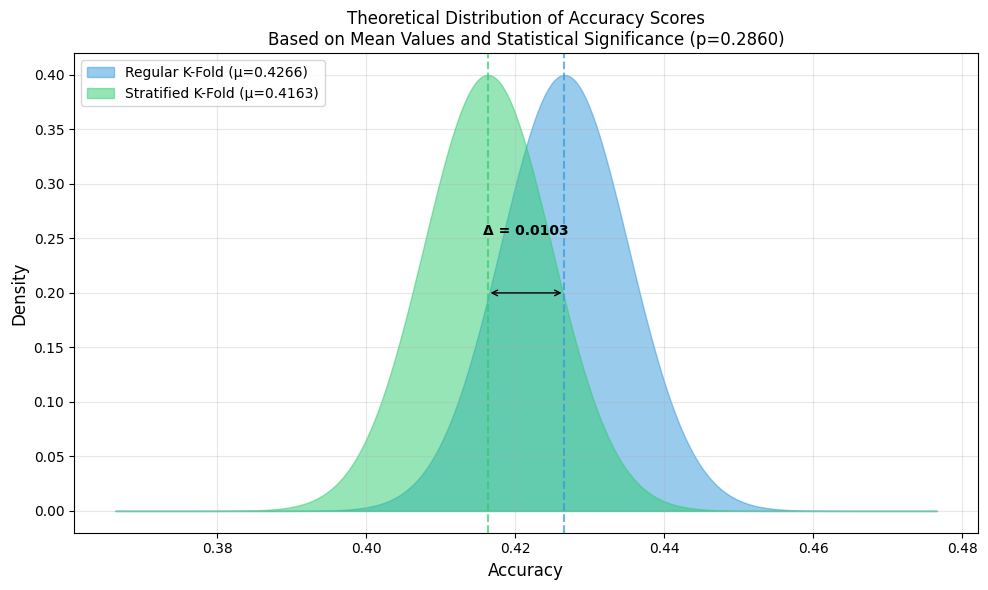

In [ ]:
pyplot.figure(figsize=(10, 6))

# Creating an x range for plotting normal distributions
x = numpy.linspace(min(kf_mean, skf_mean) - 0.05, max(kf_mean, skf_mean) + 0.05, 1000)

if p_value < 0.05:
    std_dev = abs(kf_mean - skf_mean) / 2.5
else:
    std_dev = abs(kf_mean - skf_mean) / 1.2

# Ensuring minimum spread for visualization clarity
std_dev = max(std_dev, 0.005)

kf_dist = norm.pdf(x, kf_mean, std_dev)
skf_dist = norm.pdf(x, skf_mean, std_dev)

kf_dist = kf_dist / numpy.max(kf_dist) * 0.4
skf_dist = skf_dist / numpy.max(skf_dist) * 0.4

pyplot.fill_between(x, kf_dist, alpha=0.5, color='#3498db', label=f'Regular K-Fold (μ={kf_mean:.4f})')
pyplot.fill_between(x, skf_dist, alpha=0.5, color='#2ecc71', label=f'Stratified K-Fold (μ={skf_mean:.4f})')

pyplot.axvline(x=kf_mean, color='#3498db', linestyle='--', alpha=0.7)
pyplot.axvline(x=skf_mean, color='#2ecc71', linestyle='--', alpha=0.7)

# Showing the difference between plots
pyplot.annotate('', xy=(kf_mean, 0.2), xytext=(skf_mean, 0.2), arrowprops=dict(arrowstyle='<->', color='black'))
pyplot.text((kf_mean + skf_mean)/2, 0.25, f'Δ = {abs(kf_mean - skf_mean):.4f}', ha='center', va='bottom', fontweight='bold')

pyplot.title('Theoretical Distribution of Accuracy Scores\n'
    f'Based on Mean Values and Statistical Significance (p={p_value:.4f})', fontsize=12)
pyplot.xlabel('Accuracy', fontsize=12)
pyplot.ylabel('Density', fontsize=12)
pyplot.legend(loc='upper left')
pyplot.grid(True, alpha=0.3)

pyplot.tight_layout()
pyplot.savefig('q5-2.png', dpi=300, bbox_inches='tight')
pyplot.show()

## Test q6: Unsupervised learning

The implementation transforms the standardised dataset into a two-dimensional space.

In [ ]:
lle_results = instance.q6()

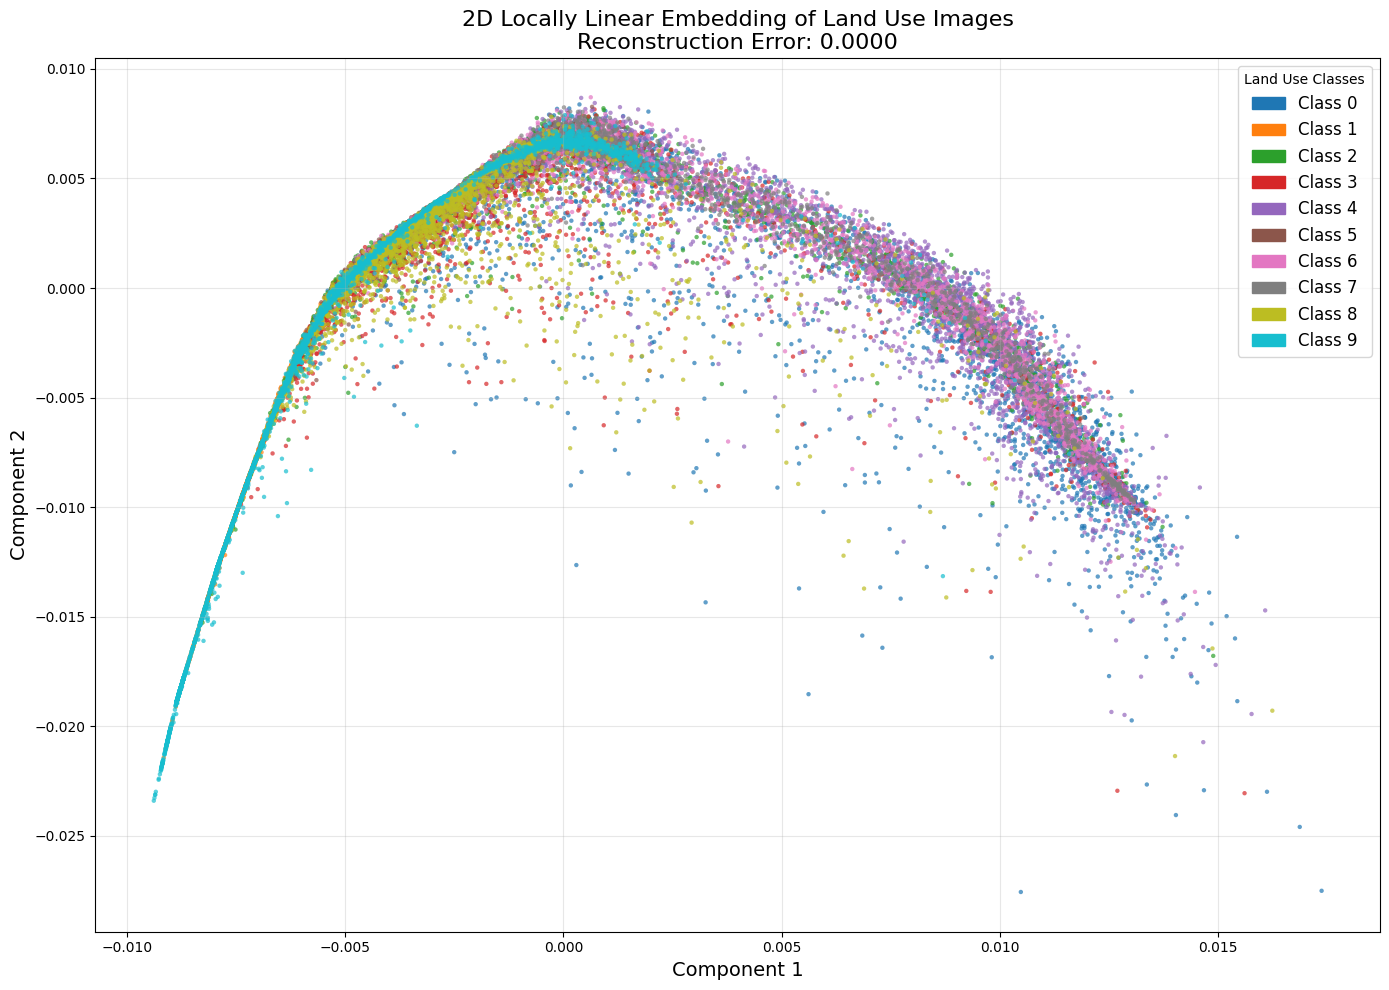

In [ ]:
# Extracting the data for visualisation
embedding = lle_results['embedding']
labels = lle_results['labels']
unique_labels = lle_results['unique_labels']
reconstruction_error = lle_results['reconstruction_error']

# Defining a colormap with distinct colors for up to 10 classes
colors = pyplot.cm.tab10(numpy.linspace(0, 1, len(unique_labels)))
cmap = ListedColormap(colors)

# Creating scatter plot of the embedding
pyplot.figure(figsize=(14, 10))
scatter = pyplot.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap=cmap, alpha=0.7, s=10, edgecolors='none')

# Creating custom legend with class names
legend_elements = []
for i, label in enumerate(unique_labels):
    legend_elements.append(mpatches.Patch(color=colors[i], label=f'Class {int(label)}'))

pyplot.legend(handles=legend_elements, loc='best', fontsize=12, title='Land Use Classes')
pyplot.title(f'2D Locally Linear Embedding of Land Use Images\nReconstruction Error: {reconstruction_error:.4f}', fontsize=16)
pyplot.xlabel('Component 1', fontsize=14)
pyplot.ylabel('Component 2', fontsize=14)
pyplot.grid(alpha=0.3)
pyplot.tight_layout()
pyplot.savefig('q6-1.png', dpi=300, bbox_inches='tight')
pyplot.show()

The following visualisation shows how the Locally Linear Embedding technique has split all the classes into distinct regions.

The following is observed:
1. Different classes occupy different regions which indicates good class separability.
2. There are differences in how tigh clusters are. This indicates the tighter classes have more consistent visual patterns. Forest seems to be the most consistent whereas AccualCrop the least.

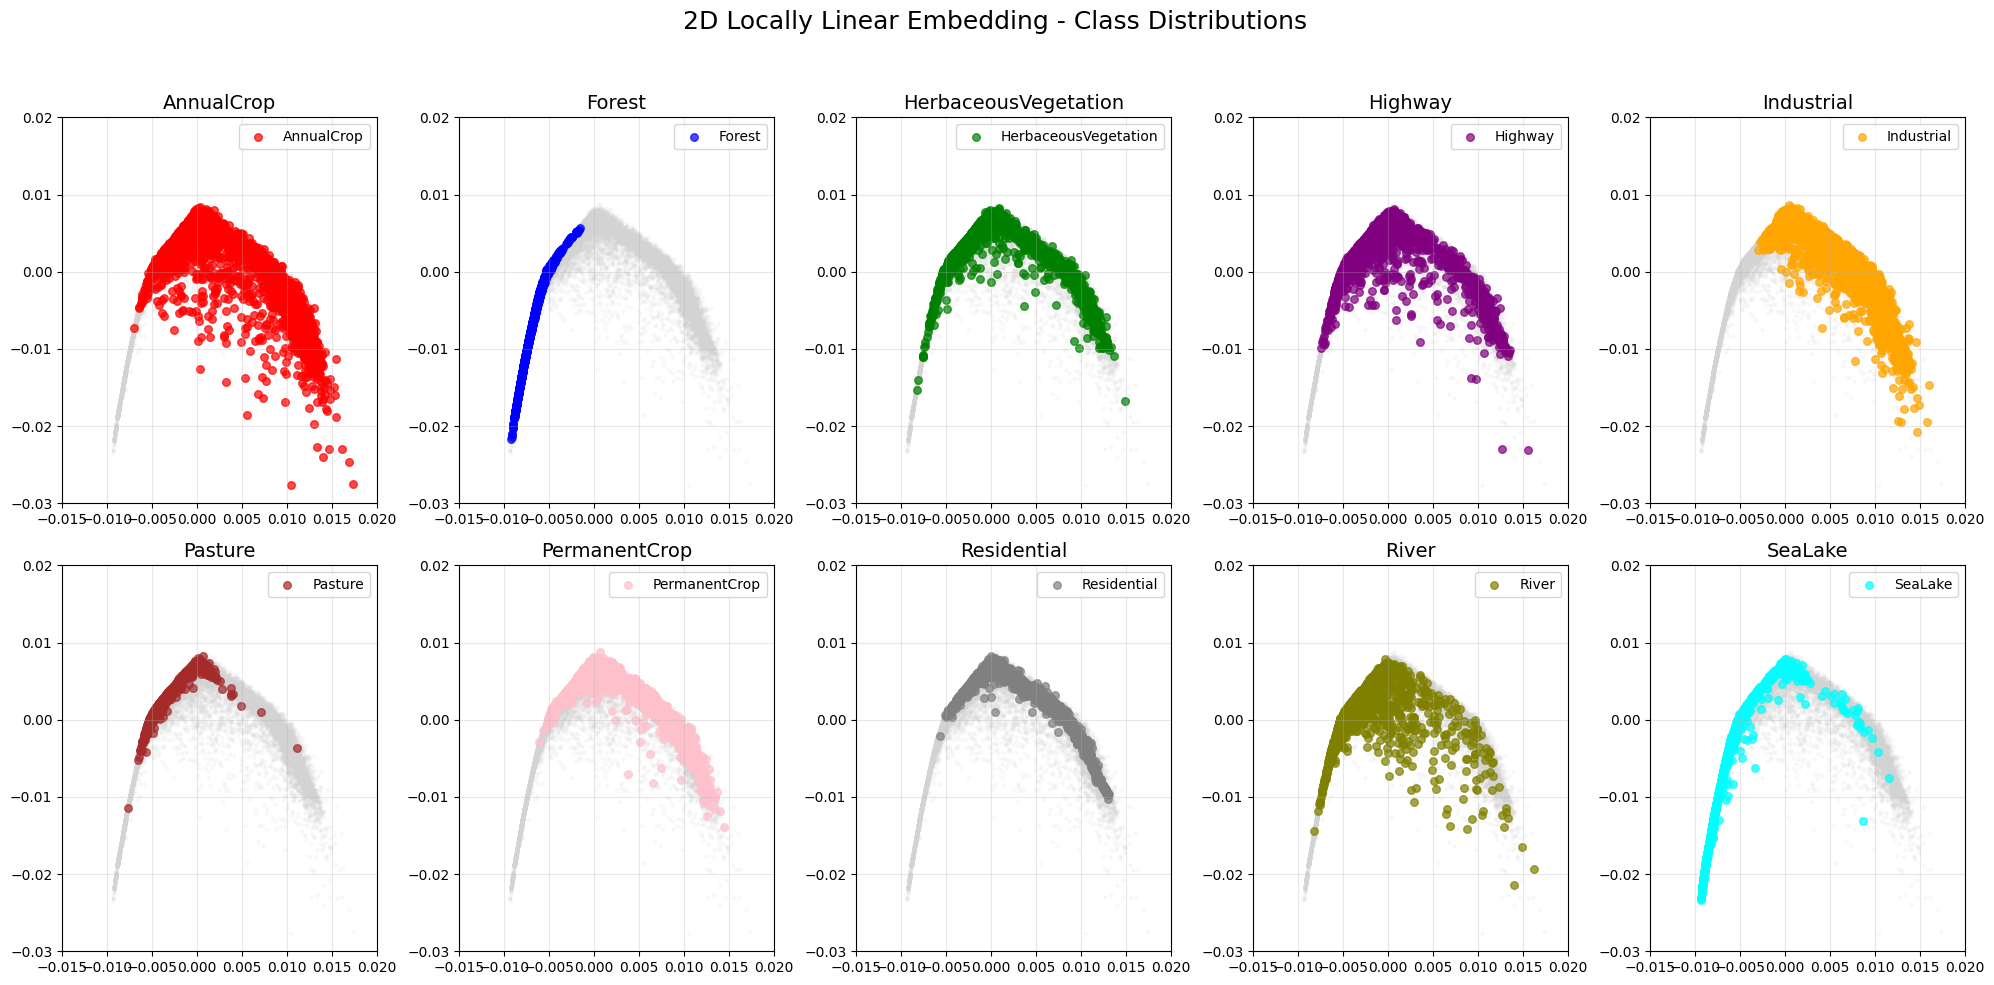

In [ ]:
# Extracting the data
embedding = lle_results['embedding']
labels = lle_results['labels']
unique_labels = lle_results['unique_labels']

folder_names = [
    'AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 
    'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake'
]
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']

fig, axes = pyplot.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

# Getting overall bounds for consistent axis limits
x_min, x_max = -0.015, 0.02
y_min, y_max = -0.03, 0.02

# Plotting each class in its own subplot
for i, label in enumerate(unique_labels):
    if i >= len(axes):
        break
    ax = axes[i]

    label_idx = int(label)
    folder_name = folder_names[label_idx] if label_idx < len(folder_names) else f'Class {label}'
    
    # Showing all points in light gray
    ax.scatter(embedding[:, 0], embedding[:, 1], color='lightgray', alpha=0.1, s=5)
    
    mask = labels == label
    points = embedding[mask]
    
    ax.scatter(points[:, 0], points[:, 1], color=colors[i % len(colors)], alpha=0.7, s=30, label=folder_name)
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title(folder_name, fontsize=14)
    ax.grid(alpha=0.3)
    ax.legend(loc='upper right')

pyplot.suptitle('2D Locally Linear Embedding - Class Distributions', fontsize=18)
pyplot.tight_layout(rect=[0, 0, 1, 0.95])
pyplot.savefig('q6-2.png', dpi=300, bbox_inches='tight')
pyplot.show()